In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import scipy.io as sio
from scipy.signal import savgol_filter
import random
from scipy import stats
from pyaldata import *

# Import model and monkey data

In [3]:
data_dir_model = '/home/cf620/git/prep_center_out/simulation/results/100022/1/'
fname = os.path.join(data_dir_model, "pydata.mat")

df = mat2dataframe(fname, shift_idx_fields=True)

In [4]:
df.head()

,session,target_id,trial_id,bin_size,idx_trial_start,idx_target_on,idx_go_cue,idx_trial_end,MCx_rates,pos,target_output,labels,labels
0,init,NaN,0,0.01,-1,1,6,21,"[[-0.024258886, 0.015279164, -0.02258536, 0.01...","[[-0.030948022, -0.7163441], [-0.071423106, -0...","[[0.20794888130572733, -0.32105447699249906], ...",NaN,2.0
1,init,NaN,1,0.01,-1,1,6,21,"[[0.018632786, 0.07587597, -0.04717581, 0.0181...","[[0.06800464, -0.24562046], [0.03734213, 0.001...","[[-0.5025897137103396, -0.5413751500040734], [...",NaN,1.0
2,init,NaN,2,0.01,-1,1,6,21,"[[0.0013372722, 0.019047098, 0.013907831, -0.0...","[[-0.11927371, -0.143772], [-0.2009363, -0.231...","[[0.12105131264015152, -0.18220629007026656], ...",NaN,6.0
3,init,NaN,3,0.01,-1,1,6,21,"[[-0.010642572, -0.023164142, -0.0344403, 0.01...","[[0.16607973, -0.16449562], [0.16457003, -0.31...","[[-0.1906332924344938, 0.33403418794665685], [...",NaN,6.0
4,init,NaN,4,0.01,-1,1,6,21,"[[0.07402427, 0.05808162, 0.041436046, 0.04008...","[[-0.28282702, -0.366056], [-0.5397192, -0.275...","[[-0.1316655385362385, 0.6448863720021754], [-...",NaN,5.0


In [5]:
for target_dir in np.unique(df['labels']):
    print(str(len(df[df['labels']==target_dir]))+ ' trials in direction: ' + str(target_dir))

38 trials in direction: 0.0
38 trials in direction: 1.0
34 trials in direction: 2.0
42 trials in direction: 3.0
32 trials in direction: 4.0
42 trials in direction: 5.0
41 trials in direction: 6.0
33 trials in direction: 7.0


Monkey

In [6]:
data_dir = '/home/cf620/Downloads/Chewie/'
file_name = 'Chewie_CO_CS_2016-10-14.mat'

td = mat2dataframe(data_dir+file_name, shift_idx_fields=True)

td = select_trials(td, "result == 'R'")
td = select_trials(td, "epoch == 'BL'")
td = add_firing_rates(td, 'smooth')
td = combine_time_bins(td, 3)
td = transform_signal(td,'pos','center')

move_td = restrict_to_interval(td, "idx_movement_on", rel_start=-7, rel_end=15)

move_td['target_output'] = move_td['vel']

from sklearn.decomposition import PCA, FactorAnalysis

pca_dims = 15

move_td = dim_reduce(move_td, PCA(pca_dims), "M1_rates", "PMd_pca")

move_td=transform_signal(move_td,'PMd_pca','center_normalize')


In [7]:
move_td.head()

,monkey,date,task,target_direction,trial_id,result,bin_size,perturbation,epoch,idx_trial_start,...,acc,force,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide,M1_rates,PMd_rates,target_output,PMd_pca
0,Chewie,10-14-2016,CO,0.785398,1,R,0.03,CS,BL,NaN,...,"[[-7.1108203014554405, 11.944303876552079], [1...","[[0.06945725298783827, 0.0343613729530524], [0...","[[0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0,...","[[3, 1], [4, 1], [4, 2], [5, 1], [6, 1], [6, 2...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[1, 1], [1, 2], [4, 1], [4, 2], [5, 1], [6, 1...","[[0.0, 40.91386, 11.780751, 0.0, 7.8448677, 0....","[[11.758698, 18.252996, 0.22607064, 0.0, 3.627...","[[-0.07619785565253771, 0.1280149873756167], [...","[[-0.23426111, -0.28191388, -0.13728437, 0.062..."
1,Chewie,10-14-2016,CO,2.356194,3,R,0.03,CS,BL,NaN,...,"[[21.89871311756403, 39.088911920684986], [7.5...","[[-0.0823498635493863, 0.0541202779898907], [-...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2,...","[[3, 1], [4, 1], [4, 2], [5, 1], [6, 1], [6, 2...","[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [4, 1], [4, 2], [5, 1], [6, 1...","[[6.244122, 18.815521, 19.571722, 0.0, 20.3472...","[[14.772278, 0.0, 3.6842697, 0.0, 0.59892654, ...","[[-2.187776530311774, 1.113188119775369], [-1....","[[0.13706721, 0.15328312, -0.13132228, -0.1353..."
2,Chewie,10-14-2016,CO,-0.785398,4,R,0.03,CS,BL,NaN,...,"[[-0.35633820976845065, -16.45921026842434], [...","[[0.20028659942992785, -0.13102667815492866], ...","[[0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0,...","[[3, 1], [4, 1], [4, 2], [5, 1], [6, 1], [6, 2...","[[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [4, 1], [4, 2], [5, 1], [6, 1...","[[0.020133557, 43.067642, 3.9321861, 0.0101394...","[[28.433403, 15.680428, 5.8725273e-05, 0.00217...","[[0.5527958185000039, -0.9035342263493199], [0...","[[-0.19923957, -0.20936231, 0.04674767, -0.065..."
3,Chewie,10-14-2016,CO,-1.570796,5,R,0.03,CS,BL,NaN,...,"[[-2.9079174147324522, -8.842384354356396], [4...","[[0.07499672392134012, -0.1712444167418918], [...","[[0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,...","[[3, 1], [4, 1], [4, 2], [5, 1], [6, 1], [6, 2...","[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[1, 1], [1, 2], [4, 1], [4, 2], [5, 1], [6, 1...","[[0.0, 61.49855, 2.702082, 0.0, 0.0023416337, ...","[[20.155956, 6.3013597, 13.869927, 0.0, 9.0953...","[[0.417565245278736, -0.6836669110907324], [0....","[[-0.3523247, -0.24090394, -0.088467084, -0.07..."
4,Chewie,10-14-2016,CO,3.141593,6,R,0.03,CS,BL,NaN,...,"[[7.143773161132283, -17.18070184748787], [1.8...","[[-0.07209868793919012, -0.11686867844150817],...","[[0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,...","[[3, 1], [4, 1], [4, 2], [5, 1], [6, 1], [6, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,...","[[1, 1], [1, 2], [4, 1], [4, 2], [5, 1], [6, 1...","[[0.9294843, 92.03546, 15.142135, 0.0, 6.48469...","[[8.368122, 4.1263723, 0.0, 0.0, 8.83562, 12.3...","[[-0.3529412523218369, -0.4902730146618936], [...","[[-0.016920334, -0.2249576, -0.16243863, -0.19..."


In [8]:
move_td.loc[1,'M1_rates'].shape

(23, 88)

In [9]:
df.loc[1,'MCx_rates'].shape

(23, 1000)

In [10]:
trial_list = []
k=0
for count, target_dir in enumerate(np.unique(move_td['target_direction'])):
    nb_trials = len(df[df['labels']==np.unique(df['labels'])[count]])
    trial_list.append(random.sample(list(move_td.index[move_td['target_direction']==target_dir]), nb_trials))

sel_trial = [item for sublist in trial_list for item in sublist]

In [11]:
sel_move = move_td.loc[sel_trial]

In [12]:
for target_dir in np.unique(sel_move['target_direction']):
    print(str(len(sel_move[sel_move['target_direction']==target_dir]))+ ' trials in direction: ' + str(target_dir))

38 trials in direction: -2.356194490192345
38 trials in direction: -1.5707963267948966
34 trials in direction: -0.7853981633974483
42 trials in direction: 0.0
32 trials in direction: 0.7853981633974483
42 trials in direction: 1.5707963267948966
41 trials in direction: 2.356194490192345
33 trials in direction: 3.141592653589793


# PCA

In [13]:
from sklearn.decomposition import PCA

pca_monkey = PCA(n_components=15)

sel_move = dim_reduce(sel_move, pca_monkey, 'M1_rates', 'M1_proj')



## CCA

In [16]:
from scipy.linalg import qr, svd, inv 
def canoncorr(X:np.array, Y: np.array, fullReturn: bool = False) -> np.array:
    """
    Canonical Correlation Analysis (CCA)
    line-by-line port from Matlab implementation of `canoncorr`
    X,Y: (samples/observations) x (features) matrix, for both: X.shape[0] >> X.shape[1]
    fullReturn: whether all outputs should be returned or just `r` be returned (not in Matlab)
    
    returns: A,B,r,U,V 
    A,B: Canonical coefficients for X and Y
    U,V: Canonical scores for the variables X and Y
    r:   Canonical correlations
    
    Signature:
    A,B,r,U,V = canoncorr(X, Y)
    """
    n, p1 = X.shape
    p2 = Y.shape[1]
    if p1 >= n or p2 >= n:
        logging.warning('Not enough samples, might cause problems')

    # Center the variables
    X = X - np.mean(X,0);
    Y = Y - np.mean(Y,0);

    # Factor the inputs, and find a full rank set of columns if necessary
    Q1,T11,perm1 = qr(X, mode='economic', pivoting=True, check_finite=True)

    rankX = sum(np.abs(np.diagonal(T11)) > np.finfo(type((np.abs(T11[0,0])))).eps*max([n,p1]));

    if rankX == 0:
        logging.error(f'stats:canoncorr:BadData = X')
    elif rankX < p1:
        logging.warning('stats:canoncorr:NotFullRank = X')
        Q1 = Q1[:,:rankX]
        T11 = T11[rankX,:rankX]

    Q2,T22,perm2 = qr(Y, mode='economic', pivoting=True, check_finite=True)
    rankY = sum(np.abs(np.diagonal(T22)) > np.finfo(type((np.abs(T22[0,0])))).eps*max([n,p2]));

    if rankY == 0:
        logging.error(f'stats:canoncorr:BadData = Y')
    elif rankY < p2:
        logging.warning('stats:canoncorr:NotFullRank = Y')
        Q2 = Q2[:,:rankY];
        T22 = T22[:rankY,:rankY];

    # Compute canonical coefficients and canonical correlations.  For rankX >
    # rankY, the economy-size version ignores the extra columns in L and rows
    # in D. For rankX < rankY, need to ignore extra columns in M and D
    # explicitly. Normalize A and B to give U and V unit variance.
    d = min(rankX,rankY);
    L,D,M = svd(Q1.T @ Q2, full_matrices=True, check_finite=True, lapack_driver='gesdd')
    M = M.T

    A = inv(T11) @ L[:,:d] * np.sqrt(n-1);
    B = inv(T22) @ M[:,:d] * np.sqrt(n-1);
    r = D[:d]
    # remove roundoff errs
    r[r>=1] = 1
    r[r<=0] = 0

    if not fullReturn:
        return r

    # Put coefficients back to their full size and their correct order
    A[perm1,:] = np.vstack((A, np.zeros((p1-rankX,d))))
    B[perm2,:] = np.vstack((B, np.zeros((p2-rankY,d))))
    
    # Compute the canonical variates
    U = X @ A
    V = Y @ B

    return A, B, r, U, V

def shuffle_along_axis(a):
    idx = random.sample(range(a.shape[0]), a.shape[0])
    return a[idx,:]

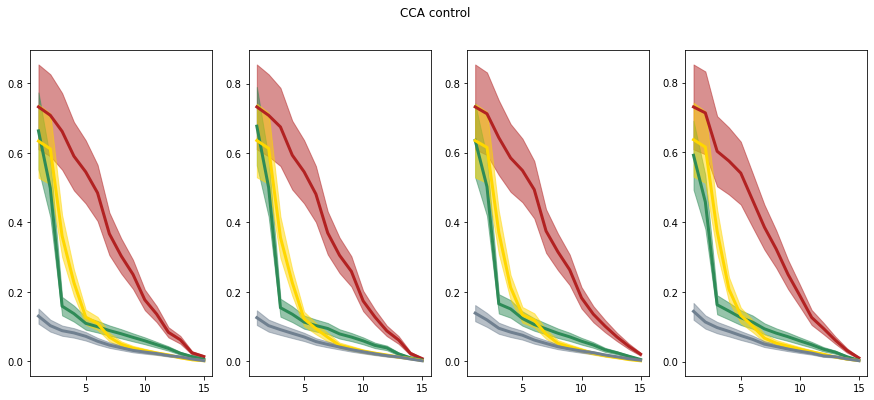

In [22]:
# create subplot for 10, 40, 70 and 100% connectivity

fig, axs = plt.subplots(1, 4, figsize=(15,6))
fig.suptitle('CCA control')

# loop over recurrent connection percentage

for i in range(1,5):
    #alocate space for cca variables 
    no_distortion = np.zeros((10, 15))
    labels = np.zeros((10, 15))
    time = np.zeros((10, 15))
    labelstime = np.zeros((10, 15))

    # loop over number of seeds:

    for j in range(1,9):
        #load data
        
        data_dir_model = '/home/cf620/git/prep_center_out/simulation/results/10002'+str(j)+'/'+str(i)+'/'
        fname = os.path.join(data_dir_model, "pydata.mat")

        df_model = mat2dataframe(fname, shift_idx_fields=True)

        pca_model = PCA(n_components=15)

        df_model = dim_reduce(df_model, pca_model, 'MCx_rates', 'MCx_proj')


        ## No distortion

        df_nodistortion = df_model.sort_values(by=['labels'])

        monkey_data_nodist = concat_trials(sel_move, 'M1_proj')
        model_data_nodist = concat_trials(df_nodistortion, 'MCx_proj')

        CC_nodistortion = canoncorr(model_data_nodist, monkey_data_nodist)

        # shuffle targets

        monkey_data_labels = concat_trials(sel_move, 'M1_proj')
        model_data_labels = concat_trials(df_model, 'MCx_proj')

        CC_labels = canoncorr(monkey_data_labels, model_data_labels)

        # shuffle in time but keep labels. i.e apply time shuffle on dataframe without distortion

        df_nodistortion['MCx_proj'] = [ shuffle_along_axis(data) for data in df_nodistortion['MCx_proj']]

        monkey_data_time = concat_trials(sel_move, 'M1_proj')
        model_data_time = concat_trials(df_nodistortion, 'MCx_proj')

        CC_time = canoncorr(monkey_data_time, model_data_time)

        # shuffle both time and targets

        df_model['MCx_proj'] = [ shuffle_along_axis(data) for data in df_model['MCx_proj']]

        monkey_data_time = concat_trials(sel_move, 'M1_proj')
        model_data_time = concat_trials(df_model, 'MCx_proj')

        CC_timelabels = canoncorr(monkey_data_time, model_data_time)

        no_distortion[j-1,:] = CC_nodistortion
        labels[j-1,:] = CC_labels
        time[j-1,:] = CC_time
        labelstime[j-1,:] = CC_timelabels

    x=range(1,16)
    y = np.mean(no_distortion, axis=0)
    error = stats.sem(no_distortion,axis=0)
    axs[i-1].plot(x, y, color='firebrick',linewidth=3, alpha=1.0)
    axs[i-1].fill_between(x, y-error, y+error, color='firebrick', alpha=0.5)

    x=range(1,16)
    y = np.mean(labels, axis=0)
    error = stats.sem(labels,axis=0)
    axs[i-1].plot(x, y, color='seagreen',linewidth=3, alpha=1.0)
    axs[i-1].fill_between(x, y-error, y+error, color='seagreen', alpha=0.5)

    x=range(1,16)
    y = np.mean(time, axis=0)
    error = stats.sem(time,axis=0)
    axs[i-1].plot(x, y, color='gold',linewidth=3, alpha=1.0)
    axs[i-1].fill_between(x, y-error, y+error, color='gold', alpha=0.5)

    x=range(1,16)
    y = np.mean(labelstime, axis=0)
    error = stats.sem(labelstime,axis=0)
    axs[i-1].plot(x, y, color='slategray',linewidth=3, alpha=1.0)
    axs[i-1].fill_between(x, y-error, y+error, color='slategray', alpha=0.5)